In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
conn = sqlite3.connect("./desktop/utk/dse511/financial.db")

In [2]:
accdist = pd.read_sql_query("SELECT account_id, district_id from account", conn)
df = pd.read_sql_query("SELECT date as 'y-m-d', balance, account_id from trans ", conn)
from datetime import date
df['y-m-d'] = pd.to_datetime(df['y-m-d'])
df['year'] = df['y-m-d'].map(lambda x: x.strftime('%Y'))
df = pd.merge(accdist, df, on='account_id')
avg = df.groupby(['year', 'district_id', 'account_id'])[['balance']].median()



In [3]:
avg

balance
year district_id account_id         
1993 1           2           31258.5
                 36          42766.0
                 186         34015.0
                 197         43683.5
                 225         24958.0
...                              ...
1998 77          4631        73226.0
                 5228        70276.0
                 5817        57957.0
                 7181        72448.0
                 8321        50387.0

[17546 rows x 1 columns]

In [4]:
median = avg.groupby(['year', 'district_id'])[['balance']].median()


In [5]:
median

balance
year district_id         
1993 1            28226.5
     2            24435.5
     3            25412.5
     4            22583.0
     5            23122.0
...                   ...
1998 73           33573.5
     74           34221.0
     75           38015.0
     76           36091.0
     77           30880.5

[462 rows x 1 columns]

In [6]:
yearlyaverage = avg.groupby(['year'])[['balance']].median()
print(yearlyaverage);

       balance
year          
1993  27879.00
1994  29708.25
1995  30318.00
1996  30771.75
1997  32317.50
1998  34024.25


In [7]:
districtchange = median.groupby(['district_id'])[['balance']].diff().fillna(0)

districtchange

balance
year district_id         
1993 1               0.00
     2               0.00
     3               0.00
     4               0.00
     5               0.00
...                   ...
1998 73            618.75
     74            -87.50
     75           7890.50
     76           2439.00
     77          -4832.50

[462 rows x 1 columns]

In [8]:
asum = districtchange.groupby(['district_id']).sum([['balance']])
pd.set_option("display.max_rows", None)
asum


,balance
district_id,
1,7650.00
2,7999.50
3,5384.25
4,12022.50
5,10685.00
6,2923.00
7,1436.25
8,8036.75
9,12797.75


<AxesSubplot:title={'center':'Change in Account Balance By District'}, xlabel='district_id', ylabel='Change in Average Account Balance'>

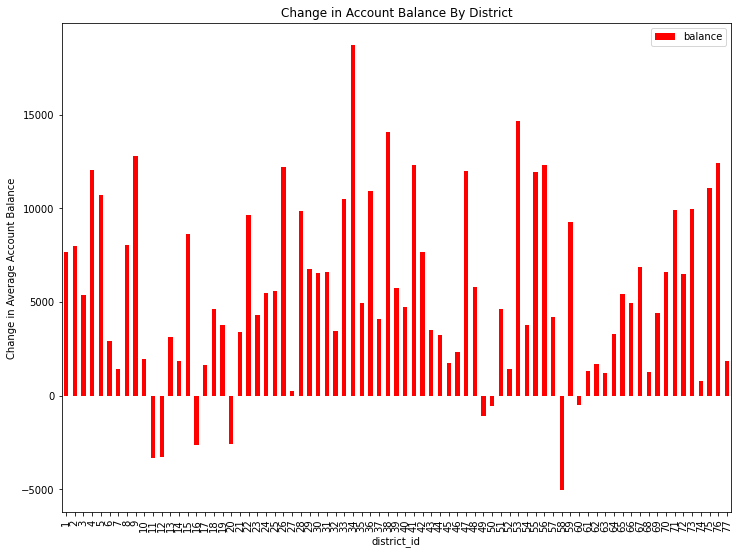

In [9]:

plt.rcParams["figure.figsize"] = [12, 9]
ax = asum.plot.bar(color = 'r')
ax.set_ylabel('Change in Average Account Balance')
ax.set_title('Change in Account Balance By District')
ax

<AxesSubplot:ylabel='Frequency'>

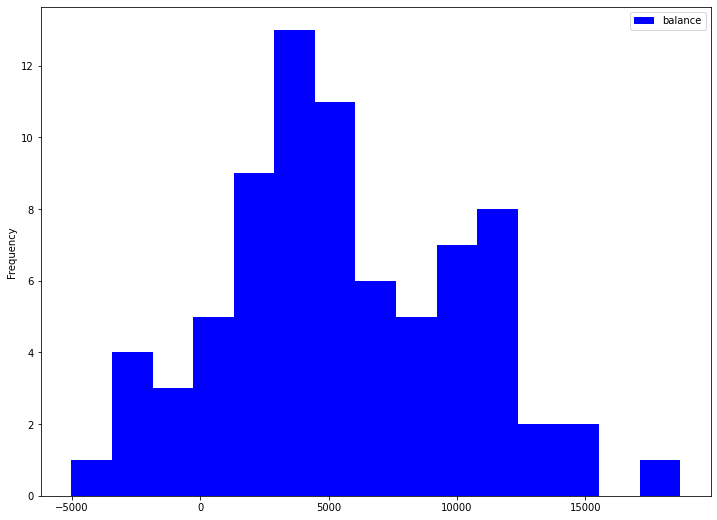

In [10]:
ax = asum.plot.hist(color = 'b', bins = 15)
ax

In [11]:
#average = avg.groupby(['year', 'district_id'])[['balance']].median()
#sum = districtchange.groupby(['district_id'])[['balance']].sum()
asum.div(302.70801242)

,balance
district_id,
1,25.271878
2,26.426456
3,17.786942
4,39.716491
5,35.298042
6,9.656170
7,4.744671
8,26.549512
9,42.277540


In [12]:
def accChangeToDemo(filepath):

    conn = sqlite3.connect(filepath)
    accdist = pd.read_sql_query("SELECT account_id, district_id from account", conn)
    df = pd.read_sql_query("SELECT date as 'y-m-d', balance, account_id from trans ", conn)
    from datetime import date
    df['y-m-d'] = pd.to_datetime(df['y-m-d'])
    df['year'] = df['y-m-d'].map(lambda x: x.strftime('%Y'))
    df = pd.merge(accdist, df, on='account_id')
    avg = df.groupby(['year', 'district_id', 'account_id'])[['balance']].median()
    average = avg.groupby(['year', 'district_id'])[['balance']].mean()
    percentChanged = (average.loc["1998"] - average.loc["1994"]) / average.loc["1994"] * 100
  
    return percentChanged
    

In [13]:
accChangeToDemo("./desktop/utk/dse511/financial.db")

,balance
district_id,
1,19.065989
2,28.526567
3,18.402489
4,19.662452
5,14.329123
6,9.852237
7,12.325839
8,11.207119
9,43.698829
